In [ ]:
#### Question: Females are more responsible for accidents than males

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats

from subprocess import check_output

# Any results you write to the current directory are saved as output.
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

### Data Cleaning

The data in the 2015 files (Casualties and Vehicles) contained an extra column, which was needed to filter out. So I used  the data only till 2014.

In [2]:
data = pd.read_csv('full_data.csv')
data.columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Vehicle_Reference_x',
       'Casualty_Reference', 'Casualty_Class', 'Sex_of_Casualty',
       'Age_of_Casualty', 'Age_Band_of_Casualty', 'Casualty_Severity',
       'Pedestrian_Locatio

#### Hypothesis 1: Females and Males cause equal number of accidents

Question: Difference in Mean Daily accidents caused by Males vs Females

In [3]:
small_data = data[['Sex_of_Driver', 'Date']]

In [4]:
data_males = small_data.loc[small_data['Sex_of_Driver']==1]
data_females = small_data.loc[small_data['Sex_of_Driver']==2]

In [5]:
males_dist = list(data_males.groupby(['Date']).count().Sex_of_Driver)
females_dist = list(data_females.groupby(['Date']).count().Sex_of_Driver)

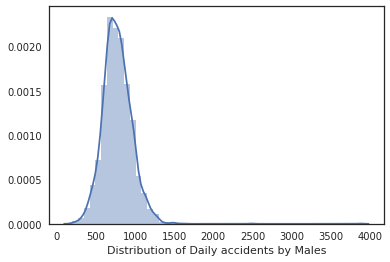

In [7]:
sns.distplot(males_dist, axlabel='Distribution of Daily accidents by Males')

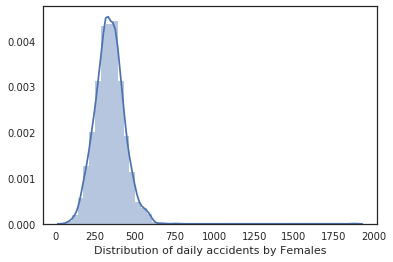

In [9]:
sns.distplot(females_dist, axlabel='Distribution of daily accidents by Females')

In [10]:
mean_males = np.mean(males_dist)
mean_females = np.mean(females_dist)

**Confidence Intervals of the difference of the means**

In [11]:
z_score = 1.645

In [12]:
male_var = np.var(males_dist)
females_var = np.var(females_dist)

In [14]:
ci_max = (mean_males - mean_females) + (z_score*np.sqrt(male_var/len(males_dist)+females_var/len(females_dist)))

In [17]:
ci_min = (mean_males - mean_females) - (z_score*np.sqrt(male_var/len(males_dist)+females_var/len(females_dist)))

In [18]:
ci_max

439.4474670018921

In [19]:
ci_min

428.08429641541335

As we can see, the range for 90% CI for difference of Mean daily accidents by males and females is (777.114, 90.417).

Also, since the interval doesn't contain a zero, we can reject the hypothesis that Males commit same number of accidents as females.

**Wald's Test**
For Wald's test, Null Hypo = The mean daily accidents of males and females are equal. 

Alternate Hypothesis = Mean daily accidents by females are more than that of males i.e. 

$H_{0}: \mu_{f} = \mu_{m}$ and $H_{1}: \mu_{f} > \mu_{m}$

In [22]:
statistic = (mean_females - mean_males)/(np.sqrt(male_var+females_var))
statistic

-2.0781953857578177

Since the Wald's statistic is less than Z_score of 90%, we will accept the Null hypothesis and reject the alternate hypothesis

**P Value calculation**

In [23]:
p_value = 1-stats.wald.cdf(statistic)
p_value

1.0

As we can see, the p value is very high, so we accept the Null Hypothesis.